In [1]:
import numpy as np # For Scientific Computation
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data.shape


(42000, 785)

In [4]:
# take first 1000 examples and transpose them so that each column represents a image
test = data[0 : 1000].T
Y_test = test[0]
X_test = test[1:n]
X_test = X_test / 255

train = data[1000 : m].T
Y_train = train[0]
X_train = train[1 : n]
X_train = X_train / 255
_, m_train = X_train.shape

In [5]:
print(X_train.shape)
print(Y_train.shape)

(784, 41000)
(41000,)


In [6]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [7]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.1
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.1
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    Z1 =  W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)  + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    


In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [9]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[2 2 8 ... 2 2 2] [9 8 1 ... 2 3 3]
0.09253658536585366
Iteration:  50
[6 8 1 ... 1 8 3] [9 8 1 ... 2 3 3]
0.5341951219512195
Iteration:  100
[4 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.751219512195122
Iteration:  150
[4 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8123170731707318
Iteration:  200
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8422682926829268
Iteration:  250
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8599512195121951
Iteration:  300
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8711951219512195
Iteration:  350
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8783414634146341
Iteration:  400
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8839268292682927
Iteration:  450
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8876341463414634
Iteration:  500
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8906829268292683
Iteration:  550
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8938048780487805
Iteration:  600
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8960487804878049
Iteration:  650
[9 8 1 ... 2 8 3] [9 8 1 ... 2 3 3]
0.8981951219512195
Iteration

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


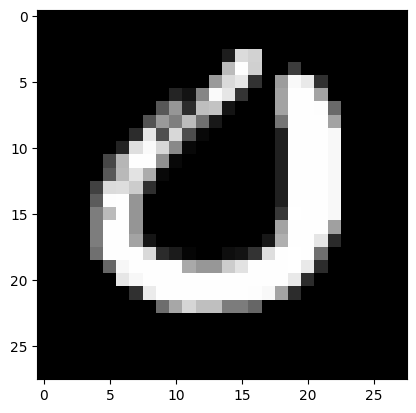

In [12]:
test_prediction(88, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[7 8 1 9 4 1 9 6 9 1 8 2 2 3 6 8 1 2 6 1 4 9 0 6 4 7 7 4 1 6 3 0 6 7 4 8 6
 7 5 8 0 2 8 3 9 0 1 8 5 9 6 1 4 1 9 3 0 1 3 3 5 5 6 4 0 4 3 7 7 3 9 0 5 2
 1 2 8 1 7 5 5 1 9 3 7 8 4 9 0 9 2 0 8 8 9 6 0 1 6 3 2 4 6 7 3 7 3 9 2 7 1
 6 4 3 7 5 3 1 0 0 9 2 2 8 6 2 2 5 2 8 0 7 3 8 5 1 3 3 6 1 3 5 8 9 9 6 3 1
 6 9 9 8 0 2 5 1 5 5 0 5 5 7 7 9 0 0 5 1 1 4 7 1 5 8 8 2 1 1 8 5 5 2 1 1 2
 0 5 7 8 4 5 9 3 6 1 8 0 1 2 6 3 5 2 1 3 2 5 9 8 0 4 2 7 7 1 5 3 9 5 3 4 9
 8 4 1 9 0 2 0 7 6 7 8 7 6 1 1 0 3 6 4 2 4 5 8 2 4 6 1 7 6 6 5 0 8 4 2 8 6
 9 3 3 6 5 2 0 8 0 9 3 2 4 4 0 5 3 3 4 0 0 4 0 3 0 9 9 4 7 7 5 9 5 9 0 2 7
 6 3 7 9 9 0 8 6 8 1 0 3 5 0 1 3 3 3 4 6 1 8 5 0 2 0 7 3 6 6 2 0 8 8 4 9 3
 6 1 9 8 1 5 3 5 3 3 2 1 0 2 6 2 3 9 5 4 6 6 9 4 0 1 3 4 4 4 7 2 6 0 4 5 2
 8 8 4 7 7 1 1 7 0 8 3 0 9 9 4 6 2 3 5 7 3 8 2 8 7 1 6 3 0 2 9 2 5 9 1 5 5
 8 8 1 2 7 6 6 0 9 7 2 2 4 1 1 0 9 7 4 6 5 5 1 8 2 8 2 3 9 0 8 5 8 3 5 8 9
 0 2 8 7 7 5 2 2 7 6 4 0 1 6 9 3 7 6 0 7 9 5 5 9 2 9 9 6 4 5 9 4 3 8 7 6 9
 0 5 7 2 7 4 0 3 3 3 6 6 

0.906